# Algoritmo de Maximização de Expectativa (EM)

## Imports

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## EM

Gerando uma mistura de Gaussianas $N(\mu_{1}=0, \sigma^{2}_{1}=1)$ e $N(\mu_{2}=2, \sigma^{2}_{2}=1.5^{2})$ nas proporções 70% e 30%, respectivamente ($\alpha = 0.7$)

Deseja-se recuperar o parâmetro $\theta = (\mu_{1}, \sigma^{2}_{1}, \mu_{2}, \sigma^{2}_{2}, \alpha)$

A verossimilhança marginal é dada por:
$$
L(\Theta|y) = \prod_{i=1}^N \left[ \alpha \cdot f(y_i|\mu_1, \sigma^{2}_{1}) + (1 - \alpha) \cdot f(y_i|\mu_2, \sigma^{2}_{2}) \right]
$$


A verossimilhança completa é dada por:
$$
L_c(\Theta|y,z) = \prod_{i=1}^N \left[ (\alpha \cdot f(y_i|\mu_1, \sigma^{2}_{1}))^{z_i} \cdot ((1 - \alpha) \cdot f(y_i|\mu_2, \sigma^{2}_{2}))^{1-z_i} \right]
$$

Onde $f$ é a função de densidade de probabilidade da Gaussiana e $z$ é o rótulo desconhecido sobre a qual classe cada dado pertence

Considerando 
$$
T^{(0)}_{i} =  P(Z_{i} = 1 | Y_{i} = y_{i}, \theta^{0}) = \frac{\alpha^{(0)} \cdot f(y_i|\mu_1^{(0)}, \sigma^{2(0)}_{1})}{\alpha^{(0)} \cdot f(y_i|\mu_1^{(0)}, \sigma^{2(0)}_{1}) + (1 - \alpha^{(0)}) \cdot f(y_i|\mu_2^{(0)}, \sigma^{2(0)}_{2})}
$$

Então 

$$
\begin{aligned}
Q(\theta | \theta^{(0)}, y) & = E[l^c(\theta | y, Z) | Y_i = y_i, \theta^{(0)}] \\ 
{} & = \sum_{i=1}^N{ E[Z_i | Y=y, \theta^{(0)}] \cdot log(\alpha f(y_i|\mu_1, \sigma^{2}_{1})) + E[1 - Z_i | Y=y, \theta^{(0)}] \cdot log((1 - \alpha) f(y_i|\mu_2, \sigma^{2}_{2}))} \\ 
{} & = \sum_{i=1}^N{ T_i^{(0)} \cdot \left( log\alpha - log\sigma_1 - \frac{1}{2}log(2\pi) - \frac{1}{2}. \left(\frac{y_i - \mu_1}{\sigma_1} \right)^2 \right) + (1 - T_i^{(0)}) \cdot  \left( log(1 - \alpha) - log\sigma_2 - \frac{1}{2}log(2\pi) - \frac{1}{2}. \left(\frac{y_i - \mu_2}{\sigma_2} \right)^2 \right)}
\end{aligned}
$$

Maximizando $Q(\theta | \theta^{(0)}, y)$ com relação a Theta (derivando e igualando a 0), obtemos:
$$
\begin{aligned}
\alpha & =  \frac{\sum_{i=1}^{N} T_i^{(0)}}{N}\\ 
\mu_1 & = \frac{\sum_{i=1}^{N} T_i^{(0)}y_i}{\sum_{i=1}^{N} T_i^{(0)}}\\ 
\sigma_1^2 & = \frac{\sum_{i=1}^{N} T_i^{(0)}(y_i - \mu_1)^2}{\sum_{i=1}^{N} T_i^{(0)}}\\
\mu_2 & = \frac{\sum_{i=1}^{N} (1 - T_i^{(0)})y_i}{\sum_{i=1}^{N} (1 - T_i^{(0)})}\\ 
\sigma_2^2 & = \frac{\sum_{i=1}^{N} (1 - T_i^{(0)})(y_i - \mu_2)^2}{\sum_{i=1}^{N} (1 - T_i^{(0)})}
\end{aligned}
$$

In [171]:
def gauss_mixture(N):
    x = np.random.normal(0, 1, int(0.7 * N))
    y = np.random.normal(2, 1.5, int(0.3 * N))
    return np.concatenate((x, y), axis=0)

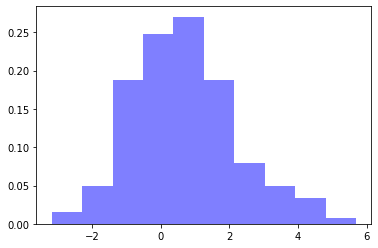

In [172]:
Y = gauss_mixture(300)

plt.hist(Y, density=True, alpha=0.5, color='b')
plt.show()

In [173]:
# Calcula função Ti = P(Zi = 1 | Yi = yi, theta^(0))
def membership_probabilities(Y, alpha, mu1, var1, mu2, var2):
    sigma1 = np.sqrt(var1)
    sigma2 = np.sqrt(var2)
    pdf1 = alpha * norm.pdf(Y, mu1, sigma1)
    pdf2 = (1 - alpha) * norm.pdf(Y, mu2, sigma2)
    return pdf1 / (pdf1 + pdf2)

In [194]:
def initialize_params():
    #alpha = np.random.rand()
    #mu1 = np.random.randn()
    #var1 = np.abs(np.random.randn())
    #mu2 = np.random.randn()
    #var2 = np.abs(np.random.randn())
    
    return 0.5, 0, 1, 2, 1

def EM(Y, n_iter=1000):
    # Inicializando parâmetros
    alpha, mu1, var1, mu2, var2 = initialize_params()
    
    for _ in range(n_iter):
        # E-Step
        T = membership_probabilities(Y, alpha, mu1, var1, mu2, var2)

        # M-Step
        N = len(Y)
        T1_sum = np.sum(T)
        T2_sum = N - T1_sum
        
        alpha = T1_sum / N
        mu1 = np.sum(T * Y) / T1_sum
        var1 = np.sum(T * (Y - mu1)**2) / T1_sum
        mu2 = np.sum((1 - T) * Y) / T2_sum
        var2 = np.sum((1 - T) * (Y - mu2)**2) / T2_sum
    
    return alpha, mu1, var1, mu2, var2

In [219]:
Y = gauss_mixture(300)

In [220]:
alpha, mu1, var1, mu2, var2 = EM(Y)

print('Resultados:')
print(f'alpha = {alpha}')
print(f'mu1 = {mu1}')
print(f'var1 = {var1}')
print(f'mu2 = {mu2}')
print(f'var2 = {var2}')

Resultados:
alpha = 0.7603609787402414
mu1 = 0.06788441488967364
var1 = 1.0426381456304654
mu2 = 2.2102070272744623
var2 = 2.581096512242917


## Resultados

Esperava-se obter o vetor $\theta = (0, 1, 2, 2.25, 0.7)$

Foi obtido o vetor $\theta = (0.06, 1.04, 2.21, 2.58, 0.76)$